# Calculating efficiencies with a 2D binning scheme

Now that we have computed some efficiencies in 1D, let's add an additional dimension, the $B^+$ pseudorapidity.
Binning in multiple dimensions allows us to capture effects between two correlated variables and can be useful for producing efficiency maps.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import ROOT as R
from triggercalib import HltEff
from triggercalib.utils.helpers import tgraph_to_np

hep.style.use("LHCb2")
R.EnableImplicitMT(8)

Welcome to JupyROOT 6.30/04


We will take the same set up as in the first tutorial, applying sideband subtraction, but we will add the additional dimension to our binning scheme and reduce the number of bins in $p_T$ for simplicity:

In [2]:
binning = {
    "B_PT"  : {"bins" : [2e3,  4e3, 6e3, 9e3, 12e3, 16e3, 20e3, 25e3]},
    "B_ETA" : {"bins" : [2, 3, 4, 5]},
}

sideband = {
    "B_DTF_Jpsi_MASS": {
        "signal": [5220, 5340], # Define the signal window
        "sidebands": [[5130, 5200], [5360, 5430]], # Define two sidebands, one above and one below the signal window
    }
}

hlt_eff = HltEff(
    "example_with_2d_bins",
    "root://eoslhcb.cern.ch//eos/lhcb/wg/rta/WP4/TriggerCalib/Bu2JpsiK_Jpsi2MuMu_block1_ntuple.root:Tuple/DecayTree",
    tos="Hlt1TrackMVA",
    tis=["Hlt1TrackMVA", "Hlt1TwoTrackMVA"],
    particle="B",
    binning=binning,
    sideband=sideband,
)

Excellent, we now have computed the 2D efficiencies, let's plot them to see what we're working with:

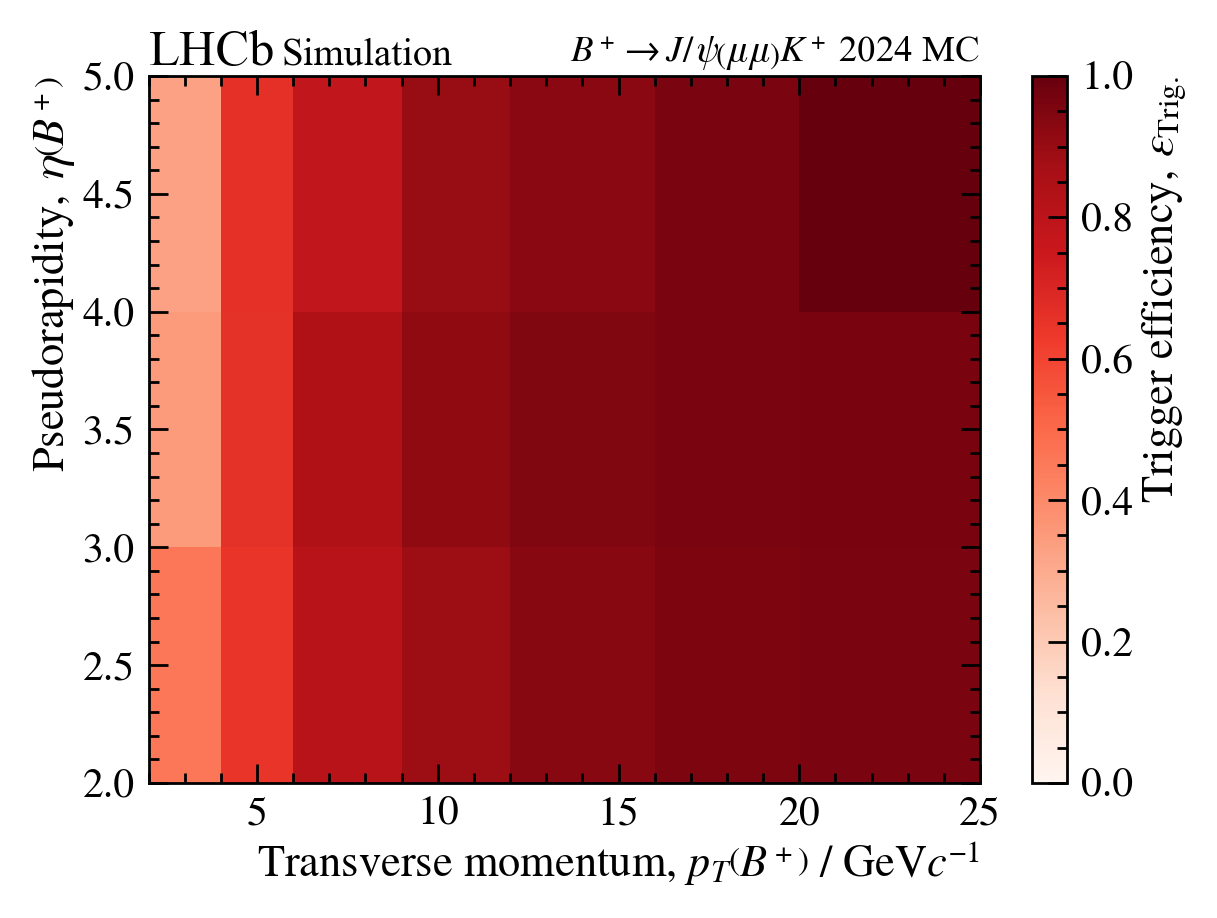

In [3]:
tgraph = hlt_eff.get_eff("trig_efficiency_B_PT_B_ETA")
xvals, yvals, zvals, xerrs, yerrs, zerrs = tgraph_to_np(tgraph, xscale=1e-3)
xedges = np.append(xvals - xerrs, xvals[-1] + xerrs[-1])
yedges = np.append(yvals - yerrs, yvals[-1] + yerrs[-1])

cmap = matplotlib.colormaps["Reds"]

plt.figure(figsize=(12, 9))
plt.pcolormesh(xedges, yedges, zvals.T, cmap=cmap, vmin=0, vmax=1)
plt.colorbar(label = r"Trigger efficiency, $\varepsilon_\mathrm{Trig.}$")

plt.xlabel(r"Transverse momentum, $p_T\left(B^+\right)$ / $\mathrm{GeV}c^{-1}$")
plt.ylabel(r"Pseudorapidity, $\eta\left(B^+\right)$")

hep.lhcb.label(loc=0, rlabel=r"$B^+\to J/\psi\left(\mu\mu\right)K^+$ 2024 MC")

plt.savefig("trig_efficiencies_2d.pdf")
plt.show()

As you can see, there is some slight variation in $\eta$ which we would otherwise not have captured in a 1D binning scheme. `hlteff` also computes the efficiencies in the two axis projections, which we can plot together in a single plot:

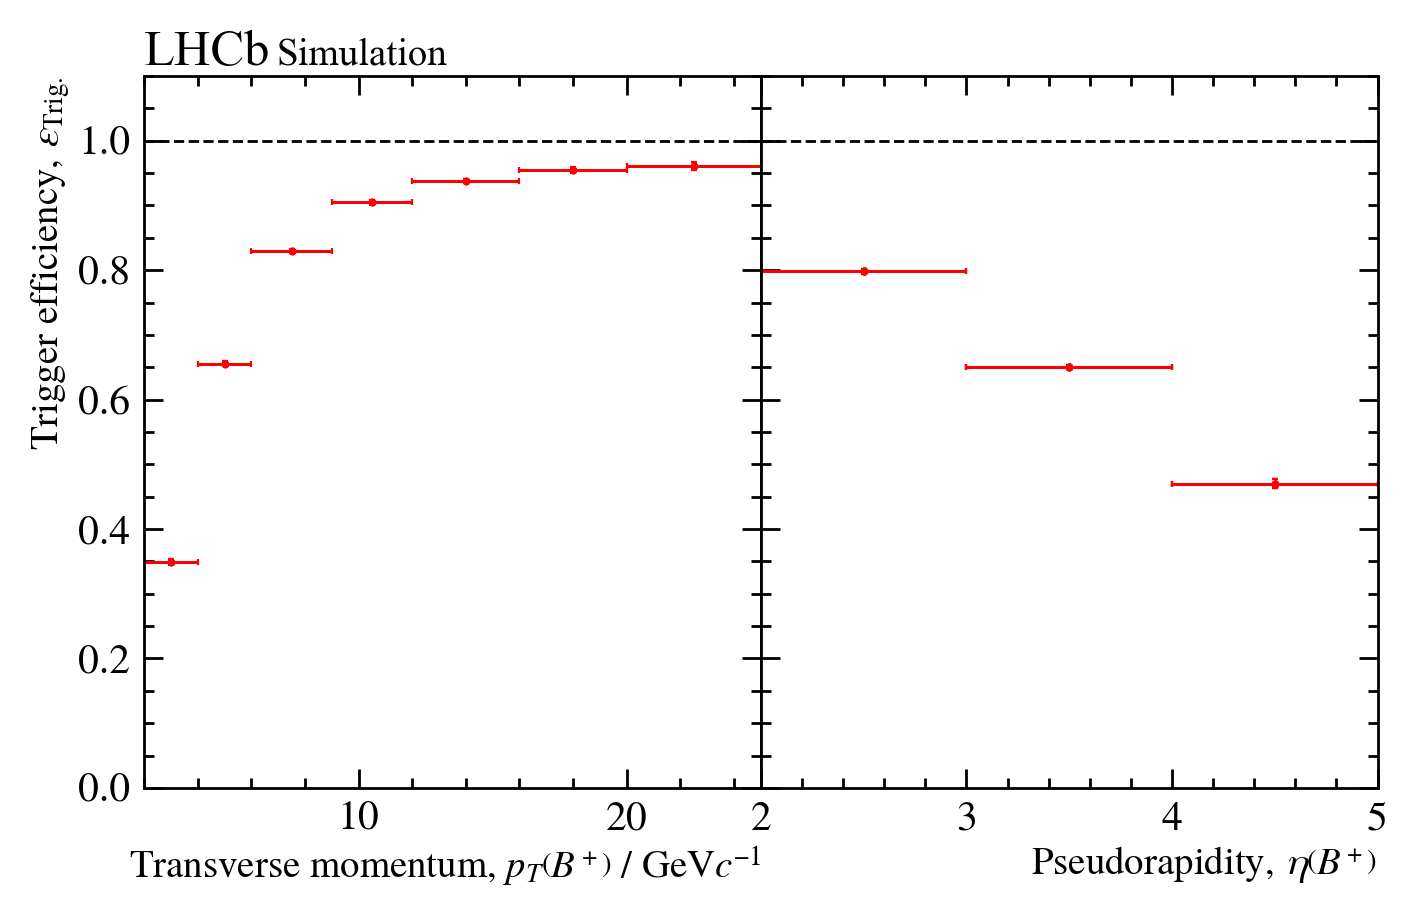

In [4]:
pt_tgraph = hlt_eff.get_eff("trig_efficiency_B_PT")
pt_xvals, pt_yvals, pt_xerrs, pt_yerrs = tgraph_to_np(pt_tgraph, xscale=1e-3)

eta_tgraph = hlt_eff.get_eff("trig_efficiency_B_ETA")
eta_xvals, eta_yvals, eta_xerrs, eta_yerrs = tgraph_to_np(eta_tgraph)

fig, (ax_pt, ax_eta) = plt.subplots(1, 2, figsize=(14,9), sharey=True, gridspec_kw={"wspace": 0})

ax_pt.plot((pt_xvals[0] - pt_xerrs[0][0], pt_xvals[-1] + pt_xerrs[1][-1]), (1,1), color='k', ls='dashed', lw=2)
ax_pt.errorbar(
    x=pt_xvals, y=pt_yvals, xerr=pt_xerrs, yerr=pt_yerrs,
    color='r', elinewidth=2, ls="none", marker='.', markersize=8, 
)
ax_pt.set_xlim(pt_xvals[0] - pt_xerrs[0][0], pt_xvals[-1] + pt_xerrs[1][-1])
ax_pt.set_xlabel(r"Transverse momentum, $p_T\left(B^+\right)$ / $\mathrm{GeV}c^{-1}$", size=28)

ax_eta.plot((eta_xvals[0] - eta_xerrs[0][0], eta_xvals[-1] + eta_xerrs[1][-1]), (1,1), color='k', ls='dashed', lw=2)
ax_eta.errorbar(
    x=eta_xvals, y=eta_yvals, xerr=eta_xerrs, yerr=eta_yerrs,
    color='r', elinewidth=2, ls="none", marker='.', markersize=8, 
)
ax_eta.set_xlim(eta_xvals[0] - eta_xerrs[0][0], eta_xvals[-1] + eta_xerrs[1][-1])
ax_eta.set_ylim(0, 1.1)
ax_eta.set_xlabel(r"Pseudorapidity, $\eta\left(B^+\right)$", size=28)

ax_pt.set_ylabel(r"Trigger efficiency, $\varepsilon_\mathrm{Trig.}$", size=28)

hep.lhcb.label(ax=ax_pt, loc=0, rlabel="")

plt.savefig("trig_efficiencies_2d_projections.pdf")
plt.show()